## SVM Python Tutorail (ML Class)

In [1]:
#Import Library
import numpy as np
import pandas as pd

#Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#Measuring Accuracy
from sklearn.metrics import accuracy_score

#Plot the graph
import matplotlib.pyplot as plt
import scikitplot as skplt          #pip install scikit-plot


In [2]:
# load and prepare the dataset
dataset = pd.read_csv('cake.csv')    #set column
dataset


,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [3]:
dataset = pd.read_csv('cake.csv',header = None, skiprows=1)    #set column
dataset = np.array(dataset)                     

In [4]:
X = dataset[:,1:8]
X

array([[55, 28, 3, 7, 5, 2, 0],
       [47, 24, 12, 6, 9, 1, 0],
       [47, 23, 18, 6, 4, 1, 0],
       [45, 11, 17, 17, 8, 1, 0],
       [50, 25, 12, 6, 5, 2, 1],
       [55, 27, 3, 7, 5, 2, 1],
       [54, 27, 7, 5, 5, 2, 0],
       [47, 26, 10, 10, 4, 1, 0],
       [50, 17, 17, 8, 6, 1, 0],
       [50, 17, 17, 11, 4, 1, 0],
       [39, 0, 26, 19, 14, 1, 1],
       [42, 21, 16, 10, 8, 3, 0],
       [34, 17, 20, 20, 5, 2, 1],
       [39, 13, 17, 19, 10, 1, 1],
       [38, 15, 23, 15, 8, 0, 1],
       [42, 18, 25, 9, 5, 1, 0],
       [36, 14, 21, 14, 11, 2, 1],
       [38, 15, 31, 8, 6, 1, 1],
       [36, 16, 24, 12, 9, 1, 1],
       [34, 17, 23, 11, 13, 0, 1],
       [29, 3, 46, 6, 0, 11, 0],
       [19, 3, 36, 3, 14, 7, 14],
       [20, 5, 52, 5, 10, 3, 0],
       [19, 6, 50, 5, 6, 10, 0],
       [19, 10, 51, 5, 0, 10, 0]], dtype=object)

In [5]:
Y = dataset[:,0]
Y

array(['Muffin', 'Muffin', 'Muffin', 'Muffin', 'Muffin', 'Muffin',
       'Muffin', 'Muffin', 'Muffin', 'Muffin', 'Cupcake', 'Cupcake',
       'Cupcake', 'Cupcake', 'Cupcake', 'Cupcake', 'Cupcake', 'Cupcake',
       'Cupcake', 'Cupcake', 'Scone', 'Scone', 'Scone', 'Scone', 'Scone'],
      dtype=object)

## PreProcessing Dataset

In [6]:
#lABEL ENCODING
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2]


In [7]:
#Shuffle
X,Y = shuffle(X,Y,random_state=1) 


## Train/Test Split

In [8]:
#Convert dataset into train and test part (20% data as test set)
train_x , test_x , train_y , test_y = train_test_split(X,Y,test_size=0.20)

## Train the Model

In [9]:
from sklearn.svm import SVC  
clf = SVC(kernel="linear")           #'linear', 'rbf', 'poly' , 'sigmoid'
clf.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Predict Train / Test Result

In [10]:
y_pred = clf.predict(train_x)                   #predict on train data
y_pred_test = clf.predict(test_x)               #predict on test data

In [11]:
print(y_pred_test) 

[0 1 2 1 0]


## Accuracy Measurement

In [12]:
print("Number of mislabeled points out of a total training set : %d"
      % (train_y != y_pred).sum())

print("Number of mislabeled points out of a total testing set : %d"
      % (test_y != y_pred_test).sum())

Number of mislabeled points out of a total training set : 0
Number of mislabeled points out of a total testing set : 0


In [13]:
accuracy_train = accuracy_score(train_y, y_pred)
print("Train Accuracy Score: %s " % (accuracy_train))

accuracy_test = accuracy_score(test_y, y_pred_test)
print("Test Accuracy Score: %s " % (accuracy_test))

Train Accuracy Score: 1.0 
Test Accuracy Score: 1.0 


In [14]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_pred, train_y)
print(cm)

[[8 0 0]
 [0 8 0]
 [0 0 4]]


## Confusion Metrix

C:\Users\ASUS.WINCTRL-LAAA72L\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


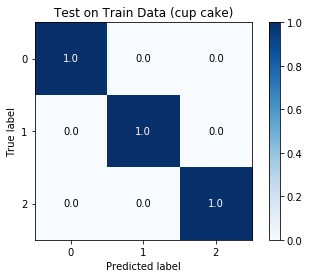

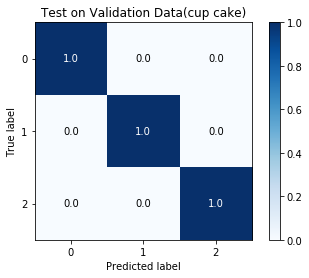

In [15]:
#Confusion Metrix
skplt.metrics.plot_confusion_matrix(train_y, y_pred, title = "Test on Train Data (cup cake)",  normalize=True)                         #pip install scikit-plot
skplt.metrics.plot_confusion_matrix(test_y, y_pred_test,title ="Test on Validation Data(cup cake)", normalize=True)                         #pip install scikit-plot
plt.show()



## Extra Visualization

Automatically created module for IPython interactive environment


C:\Users\ASUS.WINCTRL-LAAA72L\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\svm\base.py:912: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ASUS.WINCTRL-LAAA72L\AppData\Local\conda\conda\envs\tensorflow_env\lib\site-packages\sklearn\svm\base.py:194: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


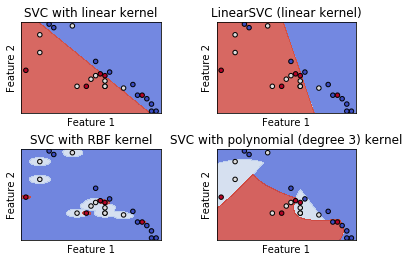

In [16]:
%matplotlib inline
print(__doc__)
from sklearn.svm import LinearSVC

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



# Take the first two features. We could avoid this by using a two-dim dataset
X = dataset[:,2:4]
y = Y

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (SVC(kernel='linear', C=C),
          LinearSVC(C=C),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()